##### NOTE: this version 

(1) engineers additional explanatory features: "Heading" and "Distance"

### Setup & Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
index_col = 'RowId'

In [3]:
!ls data

BigQuery-Dataset-Access.md		     submission_metric_map.json
bigquery-geotab-intersection-congestion.zip  test.csv
sample_submission.csv			     train.csv


In [4]:
#!chmod 777 data/* -v

### Data loading & inspection

#### "train.csv"

In [5]:
train_data = pd.read_csv('data/train.csv', index_col=index_col)

In [6]:
train_data

,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
RowId,,,,,,,,,,,,,,,,,,,,,
1920335,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
1920336,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
1920337,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
1920338,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
1920339,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777739,1990,39.93823,-75.14993,South 4th Street,South 4th Street,S,S,19,1,12,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Philadelphia
2777740,1990,39.93823,-75.14993,Catharine Street,Catharine Street,W,W,20,1,12,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Philadelphia
2777741,1990,39.93823,-75.14993,South 4th Street,Catharine Street,S,W,20,1,12,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Philadelphia


In [7]:
train_cols = train_data.columns.to_list()
train_cols

['IntersectionId',
 'Latitude',
 'Longitude',
 'EntryStreetName',
 'ExitStreetName',
 'EntryHeading',
 'ExitHeading',
 'Hour',
 'Weekend',
 'Month',
 'Path',
 'TotalTimeStopped_p20',
 'TotalTimeStopped_p40',
 'TotalTimeStopped_p50',
 'TotalTimeStopped_p60',
 'TotalTimeStopped_p80',
 'TimeFromFirstStop_p20',
 'TimeFromFirstStop_p40',
 'TimeFromFirstStop_p50',
 'TimeFromFirstStop_p60',
 'TimeFromFirstStop_p80',
 'DistanceToFirstStop_p20',
 'DistanceToFirstStop_p40',
 'DistanceToFirstStop_p50',
 'DistanceToFirstStop_p60',
 'DistanceToFirstStop_p80',
 'City']

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857409 entries, 1920335 to 2777743
Data columns (total 27 columns):
IntersectionId             857409 non-null int64
Latitude                   857409 non-null float64
Longitude                  857409 non-null float64
EntryStreetName            849220 non-null object
ExitStreetName             851875 non-null object
EntryHeading               857409 non-null object
ExitHeading                857409 non-null object
Hour                       857409 non-null int64
Weekend                    857409 non-null int64
Month                      857409 non-null int64
Path                       857409 non-null object
TotalTimeStopped_p20       857409 non-null int64
TotalTimeStopped_p40       857409 non-null int64
TotalTimeStopped_p50       857409 non-null int64
TotalTimeStopped_p60       857409 non-null int64
TotalTimeStopped_p80       857409 non-null int64
TimeFromFirstStop_p20      857409 non-null int64
TimeFromFirstStop_p40      857409 non-nu

In [9]:
train_data.describe()

,IntersectionId,Latitude,Longitude,Hour,Weekend,Month,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,...,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80
count,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,...,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000
mean,836.330832,39.657555,-77.900396,12.427463,0.277485,9.104448,1.731272,5.356027,7.681874,11.905296,...,3.126932,9.051338,12.613628,18.801785,34.037097,6.564450,19.872987,28.255852,43.273503,81.922639
std,644.200553,2.920760,5.975814,6.062097,0.447758,1.993233,7.080017,12.861420,15.553418,19.631821,...,11.631092,20.120829,23.847749,29.399634,40.619387,28.003261,56.564229,71.720090,96.933561,152.682760
min,0.000000,33.649970,-87.836750,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,306.000000,39.937600,-84.387710,8.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,685.000000,39.985810,-75.173270,13.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,60.400000
75%,1254.000000,41.918580,-75.080190,17.000000,1.000000,11.000000,0.000000,0.000000,10.000000,19.000000,...,0.000000,0.000000,22.000000,31.000000,49.000000,0.000000,0.000000,52.900000,64.100000,85.600000
max,2875.000000,42.381780,-71.023520,23.000000,1.000000,12.000000,273.000000,318.000000,343.000000,368.000000,...,334.000000,347.000000,355.000000,358.000000,359.000000,1902.700000,3099.500000,3099.500000,3581.600000,4064.300000


#### "test.csv"

In [10]:
test_data = pd.read_csv('data/test.csv', index_col=index_col)

/home/marek/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [11]:
test_data

,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,City
RowId,,,,,,,,,,,,
0,1,33.75094,-84.39303,Peachtree Street Southwest,Mitchell Street Southwest,SW,SE,0,0,6,Peachtree Street Southwest_SW_Mitchell Street ...,Atlanta
1,1,33.75094,-84.39303,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,0,0,6,Peachtree Street Southwest_SW_Peachtree Street...,Atlanta
2,1,33.75094,-84.39303,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,1,0,6,Peachtree Street Southwest_NE_Peachtree Street...,Atlanta
3,1,33.75094,-84.39303,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,1,0,6,Peachtree Street Southwest_SW_Peachtree Street...,Atlanta
4,1,33.75094,-84.39303,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,2,0,6,Peachtree Street Southwest_NE_Peachtree Street...,Atlanta
...,...,...,...,...,...,...,...,...,...,...,...,...
1920330,1990,39.93823,-75.14993,South 4th Street,South 4th Street,S,S,17,1,12,South 4th Street_S_South 4th Street_S,Philadelphia
1920331,1990,39.93823,-75.14993,South 4th Street,South 4th Street,S,S,18,1,12,South 4th Street_S_South 4th Street_S,Philadelphia
1920332,1990,39.93823,-75.14993,South 4th Street,Catharine Street,S,W,21,1,12,South 4th Street_S_Catharine Street_W,Philadelphia


In [12]:
test_cols = test_data.columns.to_list()
test_cols

['IntersectionId',
 'Latitude',
 'Longitude',
 'EntryStreetName',
 'ExitStreetName',
 'EntryHeading',
 'ExitHeading',
 'Hour',
 'Weekend',
 'Month',
 'Path',
 'City']

In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920335 entries, 0 to 1920334
Data columns (total 12 columns):
IntersectionId     int64
Latitude           float64
Longitude          float64
EntryStreetName    object
ExitStreetName     object
EntryHeading       object
ExitHeading        object
Hour               int64
Weekend            int64
Month              int64
Path               object
City               object
dtypes: float64(2), int64(4), object(6)
memory usage: 190.5+ MB


In [14]:
test_data.describe()

,IntersectionId,Latitude,Longitude,Hour,Weekend,Month
count,1.920335e+06,1.920335e+06,1.920335e+06,1.920335e+06,1.920335e+06,1.920335e+06
mean,8.362223e+02,3.965927e+01,-7.788203e+01,1.242578e+01,2.714901e-01,9.099871e+00
std,6.519923e+02,2.922351e+00,5.963292e+00,6.001556e+00,4.447284e-01,1.992443e+00
min,0.000000e+00,3.364997e+01,-8.789715e+01,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.940000e+02,3.993918e+01,-8.438424e+01,8.000000e+00,0.000000e+00,7.000000e+00
50%,6.830000e+02,4.000793e+01,-7.517224e+01,1.200000e+01,0.000000e+00,9.000000e+00
75%,1.260000e+03,4.193973e+01,-7.504678e+01,1.700000e+01,1.000000e+00,1.100000e+01
max,2.875000e+03,4.240692e+01,-7.099715e+01,2.300000e+01,1.000000e+00,1.200000e+01


#### Splitting columns between explanatory features and target variables

In [15]:
exp_cols = [col for col in train_cols if col in test_cols]
exp_cols

['IntersectionId',
 'Latitude',
 'Longitude',
 'EntryStreetName',
 'ExitStreetName',
 'EntryHeading',
 'ExitHeading',
 'Hour',
 'Weekend',
 'Month',
 'Path',
 'City']

In [16]:
tgt_cols = [col for col in train_cols if col not in test_cols]
tgt_cols

['TotalTimeStopped_p20',
 'TotalTimeStopped_p40',
 'TotalTimeStopped_p50',
 'TotalTimeStopped_p60',
 'TotalTimeStopped_p80',
 'TimeFromFirstStop_p20',
 'TimeFromFirstStop_p40',
 'TimeFromFirstStop_p50',
 'TimeFromFirstStop_p60',
 'TimeFromFirstStop_p80',
 'DistanceToFirstStop_p20',
 'DistanceToFirstStop_p40',
 'DistanceToFirstStop_p50',
 'DistanceToFirstStop_p60',
 'DistanceToFirstStop_p80']

#### setting variables to predict, according to competition requirements

In [17]:
pred_dict = {'0': 'TotalTimeStopped_p20', 
             '1': 'TotalTimeStopped_p50', 
             '2': 'TotalTimeStopped_p80', 
             '3': 'DistanceToFirstStop_p20', 
             '4': 'DistanceToFirstStop_p50', 
             '5': 'DistanceToFirstStop_p80'}

### XGBoost modelling
source: https://www.kaggle.com/inversion/ieee-simple-xgboost

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from xgboost import plot_importance

In [19]:
# setting missing value for automatic filling

missing = -999

In [20]:
submission = pd.read_csv('data/sample_submission.csv', index_col='TargetId')
submission

,Target
TargetId,
0_0,0
0_1,0
0_2,0
0_3,0
0_4,0
...,...
1920334_1,0
1920334_2,0
1920334_3,0


#### Data preparation

In [21]:
# checking the number of missing values in "train" dataset

train_data.isna().sum()

IntersectionId                0
Latitude                      0
Longitude                     0
EntryStreetName            8189
ExitStreetName             5534
EntryHeading                  0
ExitHeading                   0
Hour                          0
Weekend                       0
Month                         0
Path                          0
TotalTimeStopped_p20          0
TotalTimeStopped_p40          0
TotalTimeStopped_p50          0
TotalTimeStopped_p60          0
TotalTimeStopped_p80          0
TimeFromFirstStop_p20         0
TimeFromFirstStop_p40         0
TimeFromFirstStop_p50         0
TimeFromFirstStop_p60         0
TimeFromFirstStop_p80         0
DistanceToFirstStop_p20       0
DistanceToFirstStop_p40       0
DistanceToFirstStop_p50       0
DistanceToFirstStop_p60       0
DistanceToFirstStop_p80       0
City                          0
dtype: int64

In [22]:
# checking the number of missing values in "test" dataset

test_data.isna().sum()

IntersectionId         0
Latitude               0
Longitude              0
EntryStreetName    19157
ExitStreetName     16340
EntryHeading           0
ExitHeading            0
Hour                   0
Weekend                0
Month                  0
Path                   0
City                   0
dtype: int64

In [23]:
# preparing train data by dropping target variables and filling missing values

X_train = train_data.drop(tgt_cols, axis='columns')
X_train = X_train.fillna(missing)
X_train.shape

(857409, 12)

In [24]:
# preparing test data by filling missing values

X_test = test_data.copy()
X_test = X_test.fillna(missing)
X_test.shape

(1920335, 12)

In [25]:
# preparing target variables subset

targets = train_data[pred_dict.values()]
targets.shape

(857409, 6)

In [26]:
# checking if there are no missing values in target variables

targets.isna().sum()

TotalTimeStopped_p20       0
TotalTimeStopped_p50       0
TotalTimeStopped_p80       0
DistanceToFirstStop_p20    0
DistanceToFirstStop_p50    0
DistanceToFirstStop_p80    0
dtype: int64

In [27]:
del train_data, test_data

#### Additional features engineering

In [28]:
# engineering additional feature "Heading" 
# (i.e. combination of entry and exit headings)

X_train['Heading'] = X_train['EntryHeading'] + X_train['ExitHeading']
X_test['Heading'] = X_test['EntryHeading'] + X_test['ExitHeading']

exp_cols.append('Heading')

In [29]:
# generating city centers' dictionary to be used for distance calculations

city_centers = {}

for city in X_train['City'].unique():
    
    # filtering "train" data for each city
    city_sample = X_train[X_train['City'] == city]
    
    # calculating mean latitude/longitude for each city
    print('\nCity center parameters for {}'.format(city))
    latitude_m = city_sample['Latitude'].mean()
    print('Latitude: {:.4f}'.format(latitude_m))
    longitude_m = city_sample['Longitude'].mean()
    print('Longitude: {:.4f}'.format(longitude_m))
    
    # storing each city center's coordinates for further use
    city_centers[city] = (latitude_m, longitude_m)
    
city_centers


City center parameters for Atlanta
Latitude: 33.7683
Longitude: -84.3919

City center parameters for Boston
Latitude: 42.3365
Longitude: -71.0895

City center parameters for Chicago
Latitude: 41.8621
Longitude: -87.6845

City center parameters for Philadelphia
Latitude: 39.9686
Longitude: -75.1617


{'Atlanta': (33.76831858356533, -84.39190935702233),
 'Boston': (42.33651100702726, -71.08947275281685),
 'Chicago': (41.86212820412985, -87.68447020391477),
 'Philadelphia': (39.96861960934952, -75.1616738023939)}

In [30]:
"""
helper 'lambda' function to calculate and store distance from city center 
for train/test dataset items and "city_centers" dictionary provided 
"""

def calc_distance(item, city_centers):
    
    city = item['City']
    
    # get city center's coordinates
    latitude, longitude = city_centers[city]
    
    # calculate and store distance (root of sum of squares)
    distance = np.sqrt(((item['Latitude'] - latitude) ** 2) + ((item['Longitude'] - longitude) ** 2))
    item['Distance'] = distance
    
    return item

In [31]:
# engineering additional feature "Distance"

X_train = X_train.apply(lambda item: calc_distance(item, city_centers), axis='columns')
X_test = X_test.apply(lambda item: calc_distance(item, city_centers), axis='columns')

In [32]:
# Label Encoding for train&test categorical explanatory features

for col in exp_cols:
    if X_train[col].dtype=='object' or X_test[col].dtype=='object':
        print('\nEncoding categorical feature: {}'.format(col))
        le = LabelEncoder()
        le.fit(list(X_train[col].values) + list(X_test[col].values))
        print('Number of classes: {}'.format(len(le.classes_)))
        
        X_train[col] = le.transform(list(X_train[col].values))
        X_test[col] = le.transform(list(X_test[col].values))


Encoding categorical feature: EntryStreetName
Number of classes: 2236

Encoding categorical feature: ExitStreetName
Number of classes: 2220

Encoding categorical feature: EntryHeading
Number of classes: 8

Encoding categorical feature: ExitHeading
Number of classes: 8

Encoding categorical feature: Path
Number of classes: 21906

Encoding categorical feature: City
Number of classes: 4

Encoding categorical feature: Heading
Number of classes: 64


In [33]:
# checking if columns of both X_train and X_test datasets match

X_train.columns == X_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

#### Training and predicting

##### helper functions

In [34]:
# helper function to perform cross-validation for model and X, y variables provided

def check_cv_scores(model, X, y):
    
    cv=KFold(n_splits=5, shuffle=False)
    scoring = 'neg_mean_squared_error'
    
    print('\nPerforming cross-validation using the following cross-validator:')
    print(cv)
    
    scores = cross_val_score(estimator=model, 
                             X=X, y=y, 
                             scoring=scoring, cv=cv, 
                             n_jobs=-1, verbose=True)
    
    print('{} scores for this model:'.format(scoring))
    print(scores)
    
    return scores

In [35]:
# helper function to train model provided with "early_stopping_rounds"
# X, y pair provided is split between train and validation subsets

def train_with_esr(model, X, y):
    
    # train-test split to separate the eval_set
    X_tr, X_val, y_tr, y_val = train_test_split(X, y, 
                                                test_size=0.10, random_state=13)
    
    # model fitting
    model.fit(X_tr, y_tr, 
              eval_set=[(X_val, y_val)], eval_metric='rmse', 
              early_stopping_rounds=5, verbose=True)
    
    return model

In [36]:
# helper function to show feature importances for a model provided

def show_feat_importances(model, features):
    
    print('\nFeature importances for this model: ')
    feat_imp = pd.DataFrame(model.feature_importances_, 
                            columns = ['importance'], index=features)
    feat_imp.sort_values(by='importance', axis=0, ascending=False, inplace=True)
    print(feat_imp)
    
    plot = plot_importance(model, importance_type='gain', 
                           title='Feature importance by gain')
    plt.show()

    plot = plot_importance(model, importance_type='weight', 
                           title='Feature importance by weight')
    plt.show()
    
    return feat_imp

#### Setting model parameters

In [37]:
# maximum tree depth
max_depth = 8

# number of trees to fit
n_estimators = 3000

# setting the learning task and the corresponding learning objective
# competition rules: https://www.kaggle.com/c/bigquery-geotab-intersection-congestion/overview/evaluation
objective = 'reg:squarederror'

# learning rate
learning_rate = 0.08

# setting the feature importance type for the model's feature_importances_ property
importance_type='gain'

In [38]:
model_XGBR = XGBRegressor(booster='gbtree', 
                          importance_type=importance_type,
                          learning_rate=learning_rate,
                          max_depth=max_depth, 
                          missing=missing, 
                          n_estimators=n_estimators, 
                          n_jobs=-1, 
                          objective=objective,
                          random_state=42, 
                          verbosity=1
                         )
model_XGBR

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=-999, n_estimators=3000,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)


Modelling target: TotalTimeStopped_p20

Fitting model with early_stopping_rounds...


/home/marek/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	validation_0-rmse:7.13262
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:7.09523
[2]	validation_0-rmse:7.06307
[3]	validation_0-rmse:7.0351
[4]	validation_0-rmse:7.01004
[5]	validation_0-rmse:6.98865
[6]	validation_0-rmse:6.96954
[7]	validation_0-rmse:6.9518
[8]	validation_0-rmse:6.93584
[9]	validation_0-rmse:6.92113
[10]	validation_0-rmse:6.90782
[11]	validation_0-rmse:6.89214
[12]	validation_0-rmse:6.87306
[13]	validation_0-rmse:6.85489
[14]	validation_0-rmse:6.84286
[15]	validation_0-rmse:6.81524
[16]	validation_0-rmse:6.79208
[17]	validation_0-rmse:6.77559
[18]	validation_0-rmse:6.76154
[19]	validation_0-rmse:6.74701
[20]	validation_0-rmse:6.73413
[21]	validation_0-rmse:6.71519
[22]	validation_0-rmse:6.7011
[23]	validation_0-rmse:6.6925
[24]	validation_0-rmse:6.67838
[25]	validation_0-rmse:6.66052
[26]	validation_0-rmse:6.64944
[27]	validation_0-rmse:6.63237
[28]	validation_0-rmse:6.62122
[29]	validation_0-rmse:6.60912
[30]	validation_0-rm

[259]	validation_0-rmse:5.82675
[260]	validation_0-rmse:5.82449
[261]	validation_0-rmse:5.82303
[262]	validation_0-rmse:5.82086
[263]	validation_0-rmse:5.82022
[264]	validation_0-rmse:5.8197
[265]	validation_0-rmse:5.81934
[266]	validation_0-rmse:5.81741
[267]	validation_0-rmse:5.81451
[268]	validation_0-rmse:5.81321
[269]	validation_0-rmse:5.8122
[270]	validation_0-rmse:5.81071
[271]	validation_0-rmse:5.81006
[272]	validation_0-rmse:5.80885
[273]	validation_0-rmse:5.80652
[274]	validation_0-rmse:5.80465
[275]	validation_0-rmse:5.80384
[276]	validation_0-rmse:5.80251
[277]	validation_0-rmse:5.80155
[278]	validation_0-rmse:5.8009
[279]	validation_0-rmse:5.80077
[280]	validation_0-rmse:5.79988
[281]	validation_0-rmse:5.79936
[282]	validation_0-rmse:5.79824
[283]	validation_0-rmse:5.79708
[284]	validation_0-rmse:5.7966
[285]	validation_0-rmse:5.79438
[286]	validation_0-rmse:5.79233
[287]	validation_0-rmse:5.79109
[288]	validation_0-rmse:5.78899
[289]	validation_0-rmse:5.78869
[290]	valida

[516]	validation_0-rmse:5.61896
[517]	validation_0-rmse:5.61852
[518]	validation_0-rmse:5.61783
[519]	validation_0-rmse:5.61779
[520]	validation_0-rmse:5.61709
[521]	validation_0-rmse:5.61687
[522]	validation_0-rmse:5.61628
[523]	validation_0-rmse:5.61548
[524]	validation_0-rmse:5.61485
[525]	validation_0-rmse:5.61465
[526]	validation_0-rmse:5.61426
[527]	validation_0-rmse:5.61283
[528]	validation_0-rmse:5.61197
[529]	validation_0-rmse:5.61161
[530]	validation_0-rmse:5.61125
[531]	validation_0-rmse:5.61086
[532]	validation_0-rmse:5.60994
[533]	validation_0-rmse:5.60936
[534]	validation_0-rmse:5.60793
[535]	validation_0-rmse:5.60759
[536]	validation_0-rmse:5.60722
[537]	validation_0-rmse:5.60651
[538]	validation_0-rmse:5.60576
[539]	validation_0-rmse:5.60532
[540]	validation_0-rmse:5.60443
[541]	validation_0-rmse:5.60415
[542]	validation_0-rmse:5.60352
[543]	validation_0-rmse:5.6033
[544]	validation_0-rmse:5.60296
[545]	validation_0-rmse:5.60271
[546]	validation_0-rmse:5.60216
[547]	val

[773]	validation_0-rmse:5.5248
[774]	validation_0-rmse:5.52406
[775]	validation_0-rmse:5.52264
[776]	validation_0-rmse:5.52139
[777]	validation_0-rmse:5.52126
[778]	validation_0-rmse:5.52122
[779]	validation_0-rmse:5.52005
[780]	validation_0-rmse:5.52005
[781]	validation_0-rmse:5.51994
[782]	validation_0-rmse:5.51975
[783]	validation_0-rmse:5.51966
[784]	validation_0-rmse:5.5194
[785]	validation_0-rmse:5.51911
[786]	validation_0-rmse:5.51901
[787]	validation_0-rmse:5.51888
[788]	validation_0-rmse:5.5188
[789]	validation_0-rmse:5.51883
[790]	validation_0-rmse:5.51877
[791]	validation_0-rmse:5.51807
[792]	validation_0-rmse:5.51811
[793]	validation_0-rmse:5.51798
[794]	validation_0-rmse:5.51733
[795]	validation_0-rmse:5.51684
[796]	validation_0-rmse:5.51644
[797]	validation_0-rmse:5.51586
[798]	validation_0-rmse:5.51581
[799]	validation_0-rmse:5.51549
[800]	validation_0-rmse:5.51534
[801]	validation_0-rmse:5.51513
[802]	validation_0-rmse:5.51502
[803]	validation_0-rmse:5.51483
[804]	valid

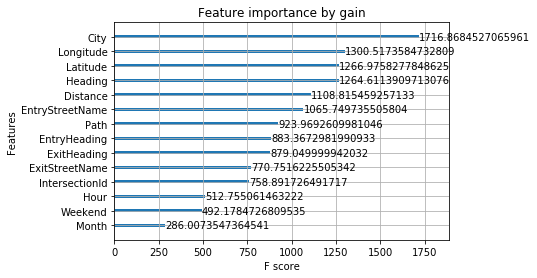

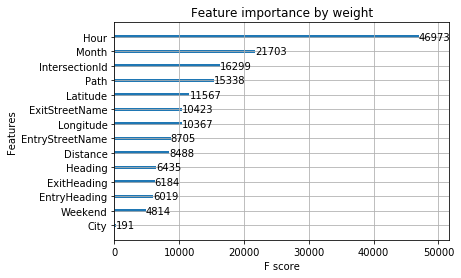


Generated 1920335 test predictions




Modelling target: TotalTimeStopped_p50

Fitting model with early_stopping_rounds...


/home/marek/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	validation_0-rmse:16.8631
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:16.5811
[2]	validation_0-rmse:16.3361
[3]	validation_0-rmse:16.1172
[4]	validation_0-rmse:15.9223
[5]	validation_0-rmse:15.7548
[6]	validation_0-rmse:15.6069
[7]	validation_0-rmse:15.4737
[8]	validation_0-rmse:15.3571
[9]	validation_0-rmse:15.2493
[10]	validation_0-rmse:15.1587
[11]	validation_0-rmse:15.0773
[12]	validation_0-rmse:15.0027
[13]	validation_0-rmse:14.9028
[14]	validation_0-rmse:14.8327
[15]	validation_0-rmse:14.7796
[16]	validation_0-rmse:14.6831
[17]	validation_0-rmse:14.6247
[18]	validation_0-rmse:14.5394
[19]	validation_0-rmse:14.5039
[20]	validation_0-rmse:14.446
[21]	validation_0-rmse:14.398
[22]	validation_0-rmse:14.338
[23]	validation_0-rmse:14.2714
[24]	validation_0-rmse:14.238
[25]	validation_0-rmse:14.1757
[26]	validation_0-rmse:14.1212
[27]	validation_0-rmse:14.0724
[28]	validation_0-rmse:14.0429
[29]	validation_0-rmse:14.0048
[30]	validation_0-rm

[259]	validation_0-rmse:11.2885
[260]	validation_0-rmse:11.2841
[261]	validation_0-rmse:11.2819
[262]	validation_0-rmse:11.2802
[263]	validation_0-rmse:11.2785
[264]	validation_0-rmse:11.2721
[265]	validation_0-rmse:11.2663
[266]	validation_0-rmse:11.2562
[267]	validation_0-rmse:11.2449
[268]	validation_0-rmse:11.2384
[269]	validation_0-rmse:11.2358
[270]	validation_0-rmse:11.2323
[271]	validation_0-rmse:11.2279
[272]	validation_0-rmse:11.2185
[273]	validation_0-rmse:11.2176
[274]	validation_0-rmse:11.2135
[275]	validation_0-rmse:11.2119
[276]	validation_0-rmse:11.2059
[277]	validation_0-rmse:11.2037
[278]	validation_0-rmse:11.196
[279]	validation_0-rmse:11.188
[280]	validation_0-rmse:11.1868
[281]	validation_0-rmse:11.1857
[282]	validation_0-rmse:11.1808
[283]	validation_0-rmse:11.1775
[284]	validation_0-rmse:11.1731
[285]	validation_0-rmse:11.1679
[286]	validation_0-rmse:11.1647
[287]	validation_0-rmse:11.1616
[288]	validation_0-rmse:11.1542
[289]	validation_0-rmse:11.1481
[290]	vali

[516]	validation_0-rmse:10.4477
[517]	validation_0-rmse:10.4465
[518]	validation_0-rmse:10.4446
[519]	validation_0-rmse:10.4435
[520]	validation_0-rmse:10.4418
[521]	validation_0-rmse:10.44
[522]	validation_0-rmse:10.4388
[523]	validation_0-rmse:10.4351
[524]	validation_0-rmse:10.4343
[525]	validation_0-rmse:10.4333
[526]	validation_0-rmse:10.4292
[527]	validation_0-rmse:10.4273
[528]	validation_0-rmse:10.4238
[529]	validation_0-rmse:10.4223
[530]	validation_0-rmse:10.4191
[531]	validation_0-rmse:10.4177
[532]	validation_0-rmse:10.4154
[533]	validation_0-rmse:10.4144
[534]	validation_0-rmse:10.4115
[535]	validation_0-rmse:10.4114
[536]	validation_0-rmse:10.4104
[537]	validation_0-rmse:10.4088
[538]	validation_0-rmse:10.405
[539]	validation_0-rmse:10.4044
[540]	validation_0-rmse:10.4029
[541]	validation_0-rmse:10.4002
[542]	validation_0-rmse:10.3974
[543]	validation_0-rmse:10.3968
[544]	validation_0-rmse:10.3924
[545]	validation_0-rmse:10.3891
[546]	validation_0-rmse:10.3872
[547]	valid

[773]	validation_0-rmse:10.0568
[774]	validation_0-rmse:10.0561
[775]	validation_0-rmse:10.0545
[776]	validation_0-rmse:10.0545
[777]	validation_0-rmse:10.054
[778]	validation_0-rmse:10.0534
[779]	validation_0-rmse:10.0522
[780]	validation_0-rmse:10.0512
[781]	validation_0-rmse:10.0494
[782]	validation_0-rmse:10.0488
[783]	validation_0-rmse:10.0477
[784]	validation_0-rmse:10.0455
[785]	validation_0-rmse:10.0449
[786]	validation_0-rmse:10.0449
[787]	validation_0-rmse:10.0443
[788]	validation_0-rmse:10.043
[789]	validation_0-rmse:10.042
[790]	validation_0-rmse:10.0408
[791]	validation_0-rmse:10.0393
[792]	validation_0-rmse:10.0386
[793]	validation_0-rmse:10.0375
[794]	validation_0-rmse:10.0363
[795]	validation_0-rmse:10.0352
[796]	validation_0-rmse:10.0341
[797]	validation_0-rmse:10.0333
[798]	validation_0-rmse:10.0317
[799]	validation_0-rmse:10.0308
[800]	validation_0-rmse:10.0299
[801]	validation_0-rmse:10.0271
[802]	validation_0-rmse:10.026
[803]	validation_0-rmse:10.0243
[804]	valida

[1030]	validation_0-rmse:9.8119
[1031]	validation_0-rmse:9.81111
[1032]	validation_0-rmse:9.81089
[1033]	validation_0-rmse:9.81045
[1034]	validation_0-rmse:9.81015
[1035]	validation_0-rmse:9.80922
[1036]	validation_0-rmse:9.80887
[1037]	validation_0-rmse:9.80829
[1038]	validation_0-rmse:9.80755
[1039]	validation_0-rmse:9.80647
[1040]	validation_0-rmse:9.80549
[1041]	validation_0-rmse:9.80448
[1042]	validation_0-rmse:9.80378
[1043]	validation_0-rmse:9.80361
[1044]	validation_0-rmse:9.80289
[1045]	validation_0-rmse:9.80255
[1046]	validation_0-rmse:9.80148
[1047]	validation_0-rmse:9.80117
[1048]	validation_0-rmse:9.79873
[1049]	validation_0-rmse:9.79862
[1050]	validation_0-rmse:9.79728
[1051]	validation_0-rmse:9.79702
[1052]	validation_0-rmse:9.79637
[1053]	validation_0-rmse:9.79563
[1054]	validation_0-rmse:9.79509
[1055]	validation_0-rmse:9.79401
[1056]	validation_0-rmse:9.79349
[1057]	validation_0-rmse:9.79336
[1058]	validation_0-rmse:9.79336
[1059]	validation_0-rmse:9.7928
[1060]	valid

[1279]	validation_0-rmse:9.67224
[1280]	validation_0-rmse:9.67186
[1281]	validation_0-rmse:9.67175
[1282]	validation_0-rmse:9.67182
[1283]	validation_0-rmse:9.67135
[1284]	validation_0-rmse:9.67097
[1285]	validation_0-rmse:9.66993
[1286]	validation_0-rmse:9.66946
[1287]	validation_0-rmse:9.66847
[1288]	validation_0-rmse:9.6679
[1289]	validation_0-rmse:9.66741
[1290]	validation_0-rmse:9.66687
[1291]	validation_0-rmse:9.66602
[1292]	validation_0-rmse:9.66653
[1293]	validation_0-rmse:9.66629
[1294]	validation_0-rmse:9.66569
[1295]	validation_0-rmse:9.66548
[1296]	validation_0-rmse:9.66501
[1297]	validation_0-rmse:9.6651
[1298]	validation_0-rmse:9.66482
[1299]	validation_0-rmse:9.6647
[1300]	validation_0-rmse:9.6647
[1301]	validation_0-rmse:9.66429
[1302]	validation_0-rmse:9.66355
[1303]	validation_0-rmse:9.66332
[1304]	validation_0-rmse:9.66333
[1305]	validation_0-rmse:9.66304
[1306]	validation_0-rmse:9.66202
[1307]	validation_0-rmse:9.66189
[1308]	validation_0-rmse:9.66071
[1309]	validat

[1529]	validation_0-rmse:9.56867
[1530]	validation_0-rmse:9.56803
[1531]	validation_0-rmse:9.56787
[1532]	validation_0-rmse:9.56767
[1533]	validation_0-rmse:9.56761
[1534]	validation_0-rmse:9.5676
[1535]	validation_0-rmse:9.56739
[1536]	validation_0-rmse:9.56719
[1537]	validation_0-rmse:9.5669
[1538]	validation_0-rmse:9.56671
[1539]	validation_0-rmse:9.56634
[1540]	validation_0-rmse:9.56626
[1541]	validation_0-rmse:9.56611
[1542]	validation_0-rmse:9.56578
[1543]	validation_0-rmse:9.5656
[1544]	validation_0-rmse:9.56538
[1545]	validation_0-rmse:9.56497
[1546]	validation_0-rmse:9.56482
[1547]	validation_0-rmse:9.56466
[1548]	validation_0-rmse:9.56335
[1549]	validation_0-rmse:9.56288
[1550]	validation_0-rmse:9.56269
[1551]	validation_0-rmse:9.56245
[1552]	validation_0-rmse:9.56239
[1553]	validation_0-rmse:9.56226
[1554]	validation_0-rmse:9.56149
[1555]	validation_0-rmse:9.56151
[1556]	validation_0-rmse:9.56095
[1557]	validation_0-rmse:9.56092
[1558]	validation_0-rmse:9.56092
[1559]	valida

[1778]	validation_0-rmse:9.49663
[1779]	validation_0-rmse:9.49614
[1780]	validation_0-rmse:9.49567
[1781]	validation_0-rmse:9.49547
[1782]	validation_0-rmse:9.49531
[1783]	validation_0-rmse:9.49536
[1784]	validation_0-rmse:9.49511
[1785]	validation_0-rmse:9.49504
[1786]	validation_0-rmse:9.49476
[1787]	validation_0-rmse:9.49428
[1788]	validation_0-rmse:9.4941
[1789]	validation_0-rmse:9.49359
[1790]	validation_0-rmse:9.49335
[1791]	validation_0-rmse:9.49323
[1792]	validation_0-rmse:9.49248
[1793]	validation_0-rmse:9.49238
[1794]	validation_0-rmse:9.49211
[1795]	validation_0-rmse:9.49188
[1796]	validation_0-rmse:9.49142
[1797]	validation_0-rmse:9.49142
[1798]	validation_0-rmse:9.49127
[1799]	validation_0-rmse:9.49088
[1800]	validation_0-rmse:9.49054
[1801]	validation_0-rmse:9.49034
[1802]	validation_0-rmse:9.49014
[1803]	validation_0-rmse:9.48841
[1804]	validation_0-rmse:9.48809
[1805]	validation_0-rmse:9.48778
[1806]	validation_0-rmse:9.48762
[1807]	validation_0-rmse:9.48707
[1808]	vali

[2028]	validation_0-rmse:9.43732
[2029]	validation_0-rmse:9.43701
[2030]	validation_0-rmse:9.43657
[2031]	validation_0-rmse:9.43656
[2032]	validation_0-rmse:9.43641
[2033]	validation_0-rmse:9.43625
[2034]	validation_0-rmse:9.43617
[2035]	validation_0-rmse:9.43578
[2036]	validation_0-rmse:9.43562
[2037]	validation_0-rmse:9.43492
[2038]	validation_0-rmse:9.43453
[2039]	validation_0-rmse:9.43384
[2040]	validation_0-rmse:9.43359
[2041]	validation_0-rmse:9.4335
[2042]	validation_0-rmse:9.43351
[2043]	validation_0-rmse:9.43322
[2044]	validation_0-rmse:9.43285
[2045]	validation_0-rmse:9.43302
[2046]	validation_0-rmse:9.43277
[2047]	validation_0-rmse:9.43264
[2048]	validation_0-rmse:9.43245
[2049]	validation_0-rmse:9.43237
[2050]	validation_0-rmse:9.43228
[2051]	validation_0-rmse:9.43226
[2052]	validation_0-rmse:9.43213
[2053]	validation_0-rmse:9.43186
[2054]	validation_0-rmse:9.43201
[2055]	validation_0-rmse:9.43204
[2056]	validation_0-rmse:9.43206
[2057]	validation_0-rmse:9.43166
[2058]	vali

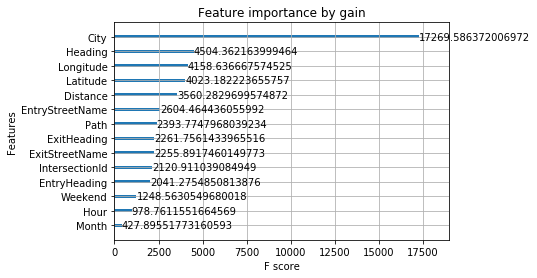

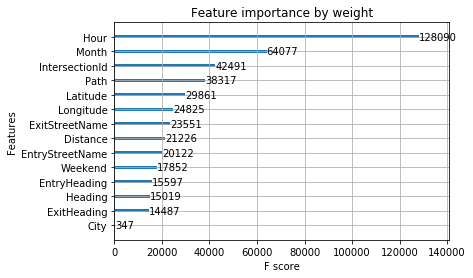


Generated 1920335 test predictions




Modelling target: TotalTimeStopped_p80

Fitting model with early_stopping_rounds...


/home/marek/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	validation_0-rmse:34.7594
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:33.6272
[2]	validation_0-rmse:32.6303
[3]	validation_0-rmse:31.7519
[4]	validation_0-rmse:30.9792
[5]	validation_0-rmse:30.2985
[6]	validation_0-rmse:29.7135
[7]	validation_0-rmse:29.1983
[8]	validation_0-rmse:28.7447
[9]	validation_0-rmse:28.3491
[10]	validation_0-rmse:28.0036
[11]	validation_0-rmse:27.6768
[12]	validation_0-rmse:27.4044
[13]	validation_0-rmse:27.1664
[14]	validation_0-rmse:26.914
[15]	validation_0-rmse:26.6755
[16]	validation_0-rmse:26.4868
[17]	validation_0-rmse:26.3363
[18]	validation_0-rmse:26.1254
[19]	validation_0-rmse:26.006
[20]	validation_0-rmse:25.8107
[21]	validation_0-rmse:25.7276
[22]	validation_0-rmse:25.5831
[23]	validation_0-rmse:25.513
[24]	validation_0-rmse:25.4085
[25]	validation_0-rmse:25.3117
[26]	validation_0-rmse:25.1882
[27]	validation_0-rmse:25.1093
[28]	validation_0-rmse:24.9925
[29]	validation_0-rmse:24.9328
[30]	validation_0-r

[259]	validation_0-rmse:19.8009
[260]	validation_0-rmse:19.8008
[261]	validation_0-rmse:19.7976
[262]	validation_0-rmse:19.7879
[263]	validation_0-rmse:19.7742
[264]	validation_0-rmse:19.7648
[265]	validation_0-rmse:19.7557
[266]	validation_0-rmse:19.7495
[267]	validation_0-rmse:19.7466
[268]	validation_0-rmse:19.7223
[269]	validation_0-rmse:19.7178
[270]	validation_0-rmse:19.7044
[271]	validation_0-rmse:19.6988
[272]	validation_0-rmse:19.6883
[273]	validation_0-rmse:19.6788
[274]	validation_0-rmse:19.6655
[275]	validation_0-rmse:19.6632
[276]	validation_0-rmse:19.6486
[277]	validation_0-rmse:19.6363
[278]	validation_0-rmse:19.6272
[279]	validation_0-rmse:19.6171
[280]	validation_0-rmse:19.6049
[281]	validation_0-rmse:19.6011
[282]	validation_0-rmse:19.5937
[283]	validation_0-rmse:19.5792
[284]	validation_0-rmse:19.5686
[285]	validation_0-rmse:19.563
[286]	validation_0-rmse:19.5568
[287]	validation_0-rmse:19.5553
[288]	validation_0-rmse:19.5424
[289]	validation_0-rmse:19.533
[290]	vali

[516]	validation_0-rmse:18.1587
[517]	validation_0-rmse:18.1555
[518]	validation_0-rmse:18.1513
[519]	validation_0-rmse:18.147
[520]	validation_0-rmse:18.1463
[521]	validation_0-rmse:18.1423
[522]	validation_0-rmse:18.1373
[523]	validation_0-rmse:18.1361
[524]	validation_0-rmse:18.1345
[525]	validation_0-rmse:18.1333
[526]	validation_0-rmse:18.1326
[527]	validation_0-rmse:18.1255
[528]	validation_0-rmse:18.1215
[529]	validation_0-rmse:18.1179
[530]	validation_0-rmse:18.1147
[531]	validation_0-rmse:18.113
[532]	validation_0-rmse:18.1088
[533]	validation_0-rmse:18.105
[534]	validation_0-rmse:18.0993
[535]	validation_0-rmse:18.0957
[536]	validation_0-rmse:18.091
[537]	validation_0-rmse:18.0884
[538]	validation_0-rmse:18.0847
[539]	validation_0-rmse:18.0835
[540]	validation_0-rmse:18.0765
[541]	validation_0-rmse:18.0736
[542]	validation_0-rmse:18.0717
[543]	validation_0-rmse:18.0696
[544]	validation_0-rmse:18.0637
[545]	validation_0-rmse:18.061
[546]	validation_0-rmse:18.0584
[547]	validat

[773]	validation_0-rmse:17.4095
[774]	validation_0-rmse:17.4086
[775]	validation_0-rmse:17.4067
[776]	validation_0-rmse:17.4028
[777]	validation_0-rmse:17.3991
[778]	validation_0-rmse:17.3967
[779]	validation_0-rmse:17.3933
[780]	validation_0-rmse:17.3924
[781]	validation_0-rmse:17.3889
[782]	validation_0-rmse:17.3864
[783]	validation_0-rmse:17.3849
[784]	validation_0-rmse:17.3827
[785]	validation_0-rmse:17.3822
[786]	validation_0-rmse:17.3807
[787]	validation_0-rmse:17.3793
[788]	validation_0-rmse:17.3786
[789]	validation_0-rmse:17.3776
[790]	validation_0-rmse:17.376
[791]	validation_0-rmse:17.3735
[792]	validation_0-rmse:17.3722
[793]	validation_0-rmse:17.3714
[794]	validation_0-rmse:17.3686
[795]	validation_0-rmse:17.366
[796]	validation_0-rmse:17.3651
[797]	validation_0-rmse:17.3633
[798]	validation_0-rmse:17.3607
[799]	validation_0-rmse:17.3587
[800]	validation_0-rmse:17.3571
[801]	validation_0-rmse:17.3528
[802]	validation_0-rmse:17.3501
[803]	validation_0-rmse:17.348
[804]	valid

[1029]	validation_0-rmse:16.9418
[1030]	validation_0-rmse:16.9417
[1031]	validation_0-rmse:16.9397
[1032]	validation_0-rmse:16.9369
[1033]	validation_0-rmse:16.9366
[1034]	validation_0-rmse:16.936
[1035]	validation_0-rmse:16.9345
[1036]	validation_0-rmse:16.9329
[1037]	validation_0-rmse:16.9307
[1038]	validation_0-rmse:16.929
[1039]	validation_0-rmse:16.9279
[1040]	validation_0-rmse:16.9263
[1041]	validation_0-rmse:16.9242
[1042]	validation_0-rmse:16.9231
[1043]	validation_0-rmse:16.9218
[1044]	validation_0-rmse:16.9205
[1045]	validation_0-rmse:16.918
[1046]	validation_0-rmse:16.9177
[1047]	validation_0-rmse:16.9156
[1048]	validation_0-rmse:16.9139
[1049]	validation_0-rmse:16.9135
[1050]	validation_0-rmse:16.9116
[1051]	validation_0-rmse:16.9086
[1052]	validation_0-rmse:16.9079
[1053]	validation_0-rmse:16.9059
[1054]	validation_0-rmse:16.9031
[1055]	validation_0-rmse:16.9022
[1056]	validation_0-rmse:16.9014
[1057]	validation_0-rmse:16.8999
[1058]	validation_0-rmse:16.8998
[1059]	valida

[1278]	validation_0-rmse:16.662
[1279]	validation_0-rmse:16.66
[1280]	validation_0-rmse:16.6592
[1281]	validation_0-rmse:16.6579
[1282]	validation_0-rmse:16.6574
[1283]	validation_0-rmse:16.6574
[1284]	validation_0-rmse:16.6555
[1285]	validation_0-rmse:16.6548
[1286]	validation_0-rmse:16.6531
[1287]	validation_0-rmse:16.6523
[1288]	validation_0-rmse:16.6512
[1289]	validation_0-rmse:16.6504
[1290]	validation_0-rmse:16.6496
[1291]	validation_0-rmse:16.6486
[1292]	validation_0-rmse:16.6473
[1293]	validation_0-rmse:16.6465
[1294]	validation_0-rmse:16.646
[1295]	validation_0-rmse:16.6458
[1296]	validation_0-rmse:16.6432
[1297]	validation_0-rmse:16.6421
[1298]	validation_0-rmse:16.6411
[1299]	validation_0-rmse:16.6394
[1300]	validation_0-rmse:16.6391
[1301]	validation_0-rmse:16.6367
[1302]	validation_0-rmse:16.6358
[1303]	validation_0-rmse:16.6355
[1304]	validation_0-rmse:16.6332
[1305]	validation_0-rmse:16.6325
[1306]	validation_0-rmse:16.6314
[1307]	validation_0-rmse:16.6306
[1308]	validat

[1527]	validation_0-rmse:16.4692
[1528]	validation_0-rmse:16.4691
[1529]	validation_0-rmse:16.4682
[1530]	validation_0-rmse:16.4671
[1531]	validation_0-rmse:16.4659
[1532]	validation_0-rmse:16.4654
[1533]	validation_0-rmse:16.4642
[1534]	validation_0-rmse:16.4637
[1535]	validation_0-rmse:16.4628
[1536]	validation_0-rmse:16.4629
[1537]	validation_0-rmse:16.4625
[1538]	validation_0-rmse:16.4627
[1539]	validation_0-rmse:16.4627
[1540]	validation_0-rmse:16.4627
[1541]	validation_0-rmse:16.462
[1542]	validation_0-rmse:16.4621
[1543]	validation_0-rmse:16.4616
[1544]	validation_0-rmse:16.4602
[1545]	validation_0-rmse:16.4599
[1546]	validation_0-rmse:16.4599
[1547]	validation_0-rmse:16.4592
[1548]	validation_0-rmse:16.459
[1549]	validation_0-rmse:16.4576
[1550]	validation_0-rmse:16.457
[1551]	validation_0-rmse:16.457
[1552]	validation_0-rmse:16.4553
[1553]	validation_0-rmse:16.4547
[1554]	validation_0-rmse:16.4539
[1555]	validation_0-rmse:16.4536
[1556]	validation_0-rmse:16.4529
[1557]	validat

[1777]	validation_0-rmse:16.3165
[1778]	validation_0-rmse:16.3164
[1779]	validation_0-rmse:16.3163
[1780]	validation_0-rmse:16.316
[1781]	validation_0-rmse:16.3153
[1782]	validation_0-rmse:16.3131
[1783]	validation_0-rmse:16.313
[1784]	validation_0-rmse:16.3125
[1785]	validation_0-rmse:16.3125
[1786]	validation_0-rmse:16.3125
[1787]	validation_0-rmse:16.3125
[1788]	validation_0-rmse:16.312
[1789]	validation_0-rmse:16.3118
[1790]	validation_0-rmse:16.3116
[1791]	validation_0-rmse:16.3109
[1792]	validation_0-rmse:16.3105
[1793]	validation_0-rmse:16.3096
[1794]	validation_0-rmse:16.3081
[1795]	validation_0-rmse:16.3063
[1796]	validation_0-rmse:16.3056
[1797]	validation_0-rmse:16.3053
[1798]	validation_0-rmse:16.3045
[1799]	validation_0-rmse:16.3032
[1800]	validation_0-rmse:16.3029
[1801]	validation_0-rmse:16.3019
[1802]	validation_0-rmse:16.3011
[1803]	validation_0-rmse:16.3011
[1804]	validation_0-rmse:16.3007
[1805]	validation_0-rmse:16.2996
[1806]	validation_0-rmse:16.2996
[1807]	valida

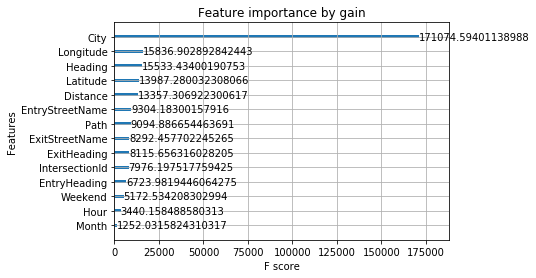

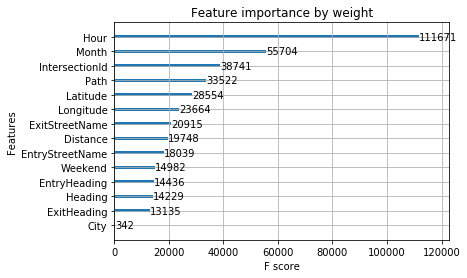


Generated 1920335 test predictions




Modelling target: DistanceToFirstStop_p20

Fitting model with early_stopping_rounds...


/home/marek/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	validation_0-rmse:27.0052
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:26.8406
[2]	validation_0-rmse:26.6961
[3]	validation_0-rmse:26.5758
[4]	validation_0-rmse:26.4712
[5]	validation_0-rmse:26.3669
[6]	validation_0-rmse:26.2809
[7]	validation_0-rmse:26.1949
[8]	validation_0-rmse:26.0634
[9]	validation_0-rmse:25.9813
[10]	validation_0-rmse:25.8948
[11]	validation_0-rmse:25.7001
[12]	validation_0-rmse:25.6153
[13]	validation_0-rmse:25.5633
[14]	validation_0-rmse:25.4923
[15]	validation_0-rmse:25.4377
[16]	validation_0-rmse:25.3835
[17]	validation_0-rmse:25.3389
[18]	validation_0-rmse:25.2844
[19]	validation_0-rmse:25.1345
[20]	validation_0-rmse:25.1091
[21]	validation_0-rmse:25.0566
[22]	validation_0-rmse:25.0187
[23]	validation_0-rmse:24.9956
[24]	validation_0-rmse:24.9304
[25]	validation_0-rmse:24.864
[26]	validation_0-rmse:24.8121
[27]	validation_0-rmse:24.7773
[28]	validation_0-rmse:24.7533
[29]	validation_0-rmse:24.6934
[30]	validation_0

[259]	validation_0-rmse:22.543
[260]	validation_0-rmse:22.5393
[261]	validation_0-rmse:22.5391
[262]	validation_0-rmse:22.534
[263]	validation_0-rmse:22.5296
[264]	validation_0-rmse:22.5265
[265]	validation_0-rmse:22.5241
[266]	validation_0-rmse:22.5194
[267]	validation_0-rmse:22.5138
[268]	validation_0-rmse:22.5083
[269]	validation_0-rmse:22.5054
[270]	validation_0-rmse:22.4998
[271]	validation_0-rmse:22.5001
[272]	validation_0-rmse:22.4984
[273]	validation_0-rmse:22.4946
[274]	validation_0-rmse:22.4928
[275]	validation_0-rmse:22.4929
[276]	validation_0-rmse:22.483
[277]	validation_0-rmse:22.4856
[278]	validation_0-rmse:22.4814
[279]	validation_0-rmse:22.4798
[280]	validation_0-rmse:22.4796
[281]	validation_0-rmse:22.4745
[282]	validation_0-rmse:22.4704
[283]	validation_0-rmse:22.4692
[284]	validation_0-rmse:22.469
[285]	validation_0-rmse:22.4654
[286]	validation_0-rmse:22.4639
[287]	validation_0-rmse:22.4664
[288]	validation_0-rmse:22.4658
[289]	validation_0-rmse:22.4592
[290]	valida

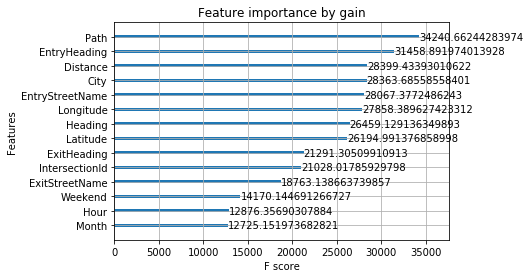

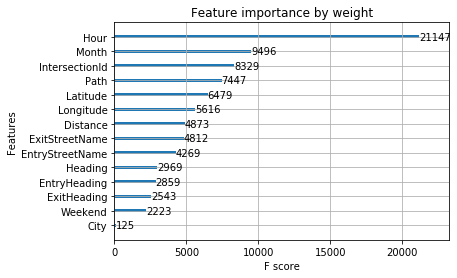


Generated 1920335 test predictions




Modelling target: DistanceToFirstStop_p50

Fitting model with early_stopping_rounds...


/home/marek/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	validation_0-rmse:74.8948
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:73.8266
[2]	validation_0-rmse:72.8775
[3]	validation_0-rmse:71.8894
[4]	validation_0-rmse:71.1459
[5]	validation_0-rmse:70.5447
[6]	validation_0-rmse:69.8383
[7]	validation_0-rmse:69.3393
[8]	validation_0-rmse:68.6657
[9]	validation_0-rmse:68.2705
[10]	validation_0-rmse:67.8098
[11]	validation_0-rmse:67.4996
[12]	validation_0-rmse:67.1602
[13]	validation_0-rmse:66.5516
[14]	validation_0-rmse:66.3065
[15]	validation_0-rmse:65.7636
[16]	validation_0-rmse:65.5167
[17]	validation_0-rmse:65.1524
[18]	validation_0-rmse:64.7755
[19]	validation_0-rmse:64.6418
[20]	validation_0-rmse:64.3906
[21]	validation_0-rmse:64.1259
[22]	validation_0-rmse:64.0329
[23]	validation_0-rmse:63.7631
[24]	validation_0-rmse:63.6876
[25]	validation_0-rmse:63.5468
[26]	validation_0-rmse:63.4273
[27]	validation_0-rmse:63.2375
[28]	validation_0-rmse:62.9692
[29]	validation_0-rmse:62.8174
[30]	validation_

[259]	validation_0-rmse:52.4123
[260]	validation_0-rmse:52.3882
[261]	validation_0-rmse:52.3798
[262]	validation_0-rmse:52.3595
[263]	validation_0-rmse:52.3423
[264]	validation_0-rmse:52.3114
[265]	validation_0-rmse:52.3057
[266]	validation_0-rmse:52.2781
[267]	validation_0-rmse:52.2678
[268]	validation_0-rmse:52.2488
[269]	validation_0-rmse:52.2349
[270]	validation_0-rmse:52.2259
[271]	validation_0-rmse:52.2091
[272]	validation_0-rmse:52.1989
[273]	validation_0-rmse:52.1897
[274]	validation_0-rmse:52.1851
[275]	validation_0-rmse:52.1728
[276]	validation_0-rmse:52.1731
[277]	validation_0-rmse:52.1637
[278]	validation_0-rmse:52.161
[279]	validation_0-rmse:52.1553
[280]	validation_0-rmse:52.1516
[281]	validation_0-rmse:52.141
[282]	validation_0-rmse:52.1315
[283]	validation_0-rmse:52.1177
[284]	validation_0-rmse:52.0998
[285]	validation_0-rmse:52.0955
[286]	validation_0-rmse:52.0882
[287]	validation_0-rmse:52.0831
[288]	validation_0-rmse:52.0743
[289]	validation_0-rmse:52.0591
[290]	vali

[516]	validation_0-rmse:50.1211
[517]	validation_0-rmse:50.1103
[518]	validation_0-rmse:50.1035
[519]	validation_0-rmse:50.101
[520]	validation_0-rmse:50.0936
[521]	validation_0-rmse:50.0912
[522]	validation_0-rmse:50.0865
[523]	validation_0-rmse:50.0786
[524]	validation_0-rmse:50.0778
[525]	validation_0-rmse:50.0744
[526]	validation_0-rmse:50.0675
[527]	validation_0-rmse:50.0641
[528]	validation_0-rmse:50.0577
[529]	validation_0-rmse:50.0523
[530]	validation_0-rmse:50.0447
[531]	validation_0-rmse:50.0427
[532]	validation_0-rmse:50.0407
[533]	validation_0-rmse:50.0336
[534]	validation_0-rmse:50.0285
[535]	validation_0-rmse:50.0208
[536]	validation_0-rmse:50.0199
[537]	validation_0-rmse:50.0138
[538]	validation_0-rmse:50.0041
[539]	validation_0-rmse:49.9941
[540]	validation_0-rmse:49.9885
[541]	validation_0-rmse:49.9869
[542]	validation_0-rmse:49.9861
[543]	validation_0-rmse:49.9798
[544]	validation_0-rmse:49.9891
[545]	validation_0-rmse:49.9854
[546]	validation_0-rmse:49.9802
[547]	val

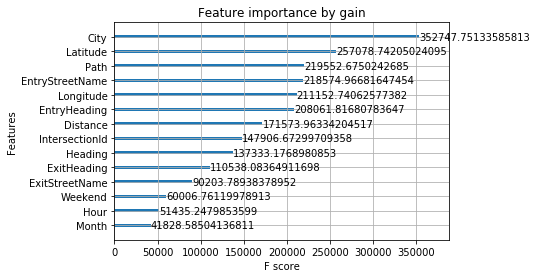

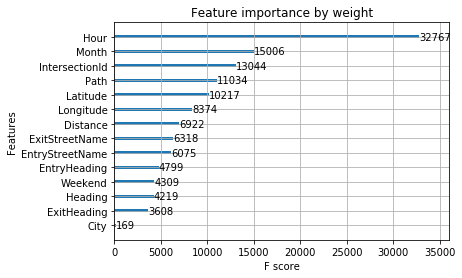


Generated 1920335 test predictions




Modelling target: DistanceToFirstStop_p80

Fitting model with early_stopping_rounds...


/home/marek/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	validation_0-rmse:168.464
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:164.125
[2]	validation_0-rmse:159.902
[3]	validation_0-rmse:156.516
[4]	validation_0-rmse:153.549
[5]	validation_0-rmse:151.207
[6]	validation_0-rmse:148.782
[7]	validation_0-rmse:146.843
[8]	validation_0-rmse:144.459
[9]	validation_0-rmse:142.565
[10]	validation_0-rmse:140.899
[11]	validation_0-rmse:139.332
[12]	validation_0-rmse:137.799
[13]	validation_0-rmse:136.607
[14]	validation_0-rmse:135.396
[15]	validation_0-rmse:134.548
[16]	validation_0-rmse:133.578
[17]	validation_0-rmse:132.852
[18]	validation_0-rmse:131.71
[19]	validation_0-rmse:131.304
[20]	validation_0-rmse:130.429
[21]	validation_0-rmse:129.86
[22]	validation_0-rmse:129.092
[23]	validation_0-rmse:128.11
[24]	validation_0-rmse:127.598
[25]	validation_0-rmse:127.305
[26]	validation_0-rmse:126.996
[27]	validation_0-rmse:126.734
[28]	validation_0-rmse:126.318
[29]	validation_0-rmse:125.481
[30]	validation_0-r

[259]	validation_0-rmse:92.5534
[260]	validation_0-rmse:92.5003
[261]	validation_0-rmse:92.454
[262]	validation_0-rmse:92.4322
[263]	validation_0-rmse:92.4092
[264]	validation_0-rmse:92.367
[265]	validation_0-rmse:92.3432
[266]	validation_0-rmse:92.3369
[267]	validation_0-rmse:92.3353
[268]	validation_0-rmse:92.3253
[269]	validation_0-rmse:92.2703
[270]	validation_0-rmse:92.2533
[271]	validation_0-rmse:92.1742
[272]	validation_0-rmse:92.142
[273]	validation_0-rmse:92.1247
[274]	validation_0-rmse:92.0495
[275]	validation_0-rmse:91.9859
[276]	validation_0-rmse:91.9718
[277]	validation_0-rmse:91.8432
[278]	validation_0-rmse:91.7887
[279]	validation_0-rmse:91.6566
[280]	validation_0-rmse:91.6334
[281]	validation_0-rmse:91.5979
[282]	validation_0-rmse:91.5737
[283]	validation_0-rmse:91.4753
[284]	validation_0-rmse:91.4523
[285]	validation_0-rmse:91.3624
[286]	validation_0-rmse:91.3195
[287]	validation_0-rmse:91.2908
[288]	validation_0-rmse:91.2526
[289]	validation_0-rmse:91.2515
[290]	valid

[516]	validation_0-rmse:85.7213
[517]	validation_0-rmse:85.7122
[518]	validation_0-rmse:85.7082
[519]	validation_0-rmse:85.6896
[520]	validation_0-rmse:85.6534
[521]	validation_0-rmse:85.6374
[522]	validation_0-rmse:85.6383
[523]	validation_0-rmse:85.6322
[524]	validation_0-rmse:85.605
[525]	validation_0-rmse:85.5917
[526]	validation_0-rmse:85.5597
[527]	validation_0-rmse:85.5261
[528]	validation_0-rmse:85.5217
[529]	validation_0-rmse:85.5073
[530]	validation_0-rmse:85.4969
[531]	validation_0-rmse:85.4802
[532]	validation_0-rmse:85.47
[533]	validation_0-rmse:85.4606
[534]	validation_0-rmse:85.4572
[535]	validation_0-rmse:85.4382
[536]	validation_0-rmse:85.4297
[537]	validation_0-rmse:85.4123
[538]	validation_0-rmse:85.4036
[539]	validation_0-rmse:85.3792
[540]	validation_0-rmse:85.3731
[541]	validation_0-rmse:85.3619
[542]	validation_0-rmse:85.3526
[543]	validation_0-rmse:85.3433
[544]	validation_0-rmse:85.3236
[545]	validation_0-rmse:85.3001
[546]	validation_0-rmse:85.2902
[547]	valid

[773]	validation_0-rmse:83.2431
[774]	validation_0-rmse:83.231
[775]	validation_0-rmse:83.2323
[776]	validation_0-rmse:83.2207
[777]	validation_0-rmse:83.2147
[778]	validation_0-rmse:83.2104
[779]	validation_0-rmse:83.2017
[780]	validation_0-rmse:83.1897
[781]	validation_0-rmse:83.1845
[782]	validation_0-rmse:83.1727
[783]	validation_0-rmse:83.1686
[784]	validation_0-rmse:83.156
[785]	validation_0-rmse:83.1448
[786]	validation_0-rmse:83.1428
[787]	validation_0-rmse:83.1262
[788]	validation_0-rmse:83.1243
[789]	validation_0-rmse:83.1151
[790]	validation_0-rmse:83.1093
[791]	validation_0-rmse:83.1028
[792]	validation_0-rmse:83.0897
[793]	validation_0-rmse:83.0797
[794]	validation_0-rmse:83.0749
[795]	validation_0-rmse:83.0749
[796]	validation_0-rmse:83.0669
[797]	validation_0-rmse:83.069
[798]	validation_0-rmse:83.0698
[799]	validation_0-rmse:83.0649
[800]	validation_0-rmse:83.0545
[801]	validation_0-rmse:83.0484
[802]	validation_0-rmse:83.0447
[803]	validation_0-rmse:83.0351
[804]	valid

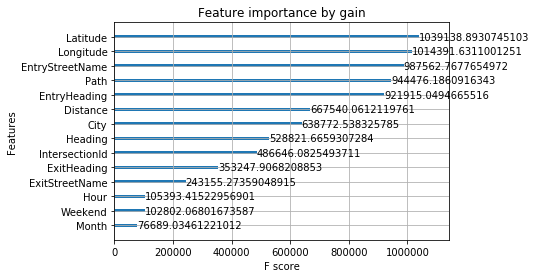

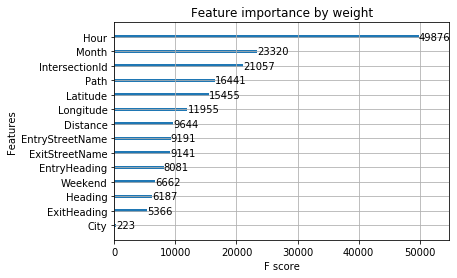


Generated 1920335 test predictions





In [39]:
# main modelling loop (over prediction targets) - fitting with ESR

for item, col in pred_dict.items():
    
    i = int(item)
    
    # setting target variable
    print('\nModelling target: {}'.format(col))    
    y_train = targets[col]
    

    # cross-validation
    # check_cv_scores(model=model_XGBR, X=X_train, y=y_train)
    
    
    # fitting model with early stopping rounds
    print('\nFitting model with early_stopping_rounds...')
    model_XGBR = train_with_esr(model=model_XGBR, X=X_train, y=y_train)
    
    
    # fitting model on full train dataset
    # print('\nFitting model on full train dataset...')
    # model_XGBR.fit(X_train, y_train)
    
    
    # making predictions and checking error for train dataset (in-sample check)
    y_pred_train = model_XGBR.predict(X_train)
    MSE = mean_squared_error(y_true=y_train, y_pred=y_pred_train)
    print('RMSE metric on full train data: {}'.format(np.sqrt(MSE)))
    
    # checking feature importances
    show_feat_importances(model=model_XGBR, features=X_train.columns)
    
    # making predictions for test dataset
    y_pred_test = model_XGBR.predict(X_test)
    print('\nGenerated {} test predictions'.format(y_pred_test.shape[0]))
    
    # checking for negative prediction values
    neg = (y_pred_test < 0).sum()
    if neg > 0:
        print('\nWARNING: {} negative predictions for target variable {}'
              .format(neg, col))
    
    # storing predictions for particular dependent variable
    submission['Target'][i::6] = y_pred_test
    
    print('\n', 84*'=', '\n')

In [46]:
# setting optimal number of estimators for each prediction target separately
# taken from the "best_iteration" result of learing with "early_stopping_rounds"
# ref. cell above

opt_n_estimators = {'TotalTimeStopped_p20' : 856, 
                    'TotalTimeStopped_p50' : 2255, 
                    'TotalTimeStopped_p80' : 1966, 
                    'DistanceToFirstStop_p20' : 396, 
                    'DistanceToFirstStop_p50' : 597, 
                    'DistanceToFirstStop_p80' : 947
                   }


Modelling target: TotalTimeStopped_p20

Fitting model on full train dataset with n_estimators=856 ...


/home/marek/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/marek/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


MSE metric on full train data: 24.03757878302895

Feature importances for this model: 
                 importance
City               0.135332
Longitude          0.106524
Heading            0.097013
Latitude           0.094707
Distance           0.081301
EntryStreetName    0.078258
Path               0.070935
EntryHeading       0.066111
ExitStreetName     0.060127
ExitHeading        0.057564
IntersectionId     0.056851
Hour               0.038058
Weekend            0.036241
Month              0.020980


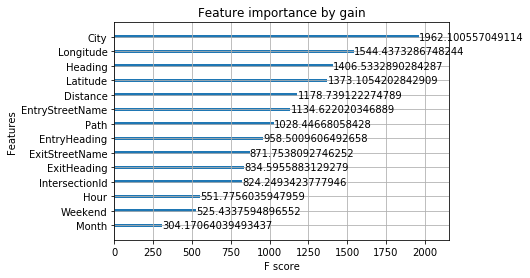

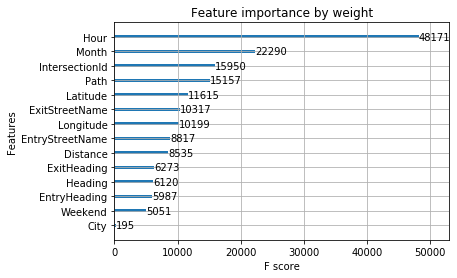


Generated 1920335 test predictions




Modelling target: TotalTimeStopped_p50

Fitting model on full train dataset with n_estimators=2255 ...


/home/marek/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/marek/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


MSE metric on full train data: 83.8512868774654

Feature importances for this model: 
                 importance
City               0.375444
Heading            0.085694
Latitude           0.080052
Longitude          0.076484
Distance           0.065414
EntryStreetName    0.055128
Path               0.046106
ExitStreetName     0.043825
IntersectionId     0.042113
ExitHeading        0.041423
EntryHeading       0.037474
Weekend            0.024550
Hour               0.018558
Month              0.007736


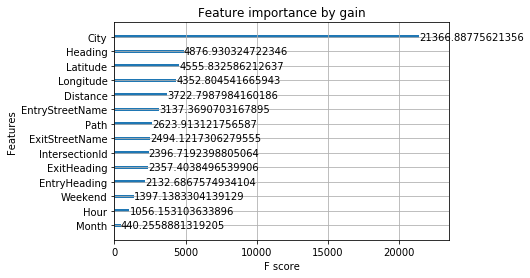

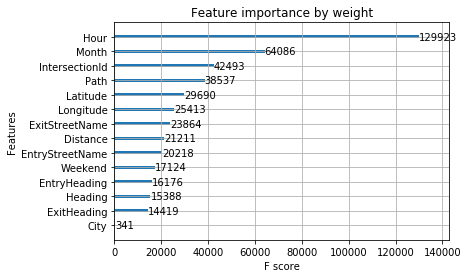


Generated 1920335 test predictions




Modelling target: TotalTimeStopped_p80

Fitting model on full train dataset with n_estimators=1966 ...


/home/marek/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/marek/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


MSE metric on full train data: 248.1290739741019

Feature importances for this model: 
                 importance
City               0.590729
Heading            0.054112
Longitude          0.053806
Latitude           0.050978
Distance           0.046085
EntryStreetName    0.033915
Path               0.032274
ExitHeading        0.027534
ExitStreetName     0.027488
IntersectionId     0.026507
EntryHeading       0.022878
Weekend            0.017615
Hour               0.011982
Month              0.004098


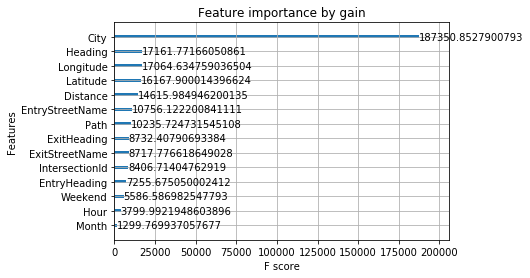

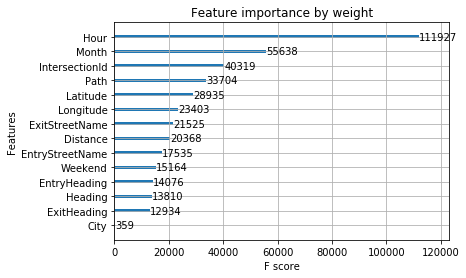


Generated 1920335 test predictions




Modelling target: DistanceToFirstStop_p20

Fitting model on full train dataset with n_estimators=396 ...


/home/marek/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/marek/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


MSE metric on full train data: 446.607521448575

Feature importances for this model: 
                 importance
Path               0.108865
Distance           0.093432
Latitude           0.092086
EntryHeading       0.088554
Heading            0.084684
City               0.083406
EntryStreetName    0.078781
Longitude          0.078340
IntersectionId     0.063356
ExitHeading        0.060520
ExitStreetName     0.056756
Weekend            0.039738
Hour               0.036994
Month              0.034489


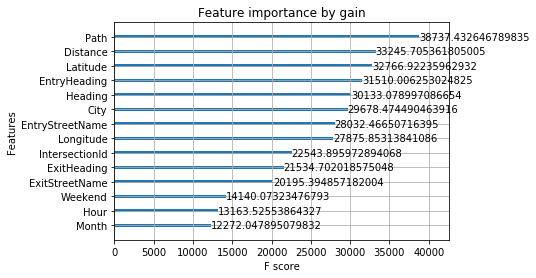

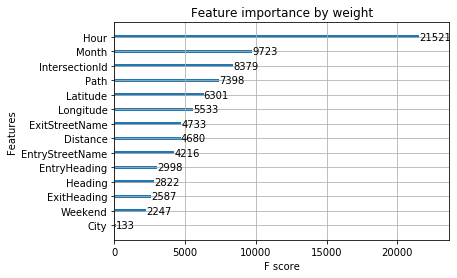


Generated 1920335 test predictions




Modelling target: DistanceToFirstStop_p50

Fitting model on full train dataset with n_estimators=597 ...


/home/marek/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/marek/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


MSE metric on full train data: 1911.1181761472403

Feature importances for this model: 
                 importance
City               0.148694
Latitude           0.110710
Path               0.102538
Longitude          0.094706
EntryStreetName    0.087077
EntryHeading       0.084035
Distance           0.081567
IntersectionId     0.070288
Heading            0.062422
ExitHeading        0.046585
ExitStreetName     0.037906
Weekend            0.032642
Hour               0.023345
Month              0.017485


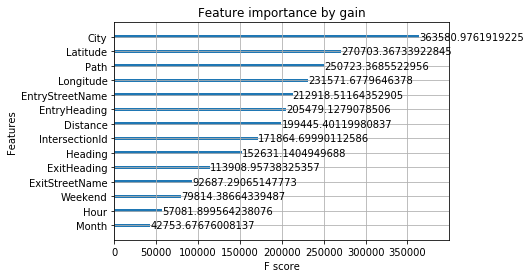

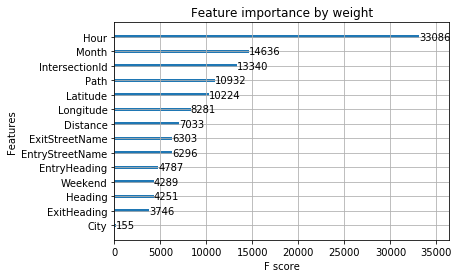


Generated 1920335 test predictions




Modelling target: DistanceToFirstStop_p80

Fitting model on full train dataset with n_estimators=947 ...


/home/marek/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/marek/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


MSE metric on full train data: 5036.531309061633

Feature importances for this model: 
                 importance
Latitude           0.131274
EntryStreetName    0.128930
EntryHeading       0.114978
Longitude          0.114560
Path               0.113004
City               0.084275
Distance           0.079414
Heading            0.066905
IntersectionId     0.061045
ExitHeading        0.038862
ExitStreetName     0.031279
Weekend            0.014059
Hour               0.012649
Month              0.008765


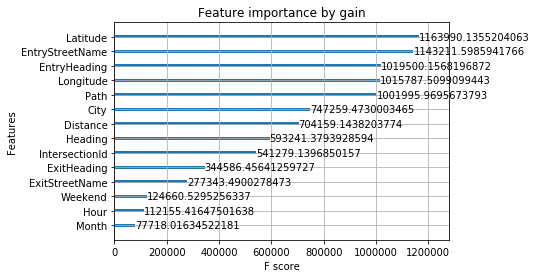

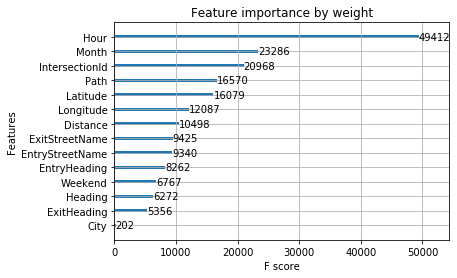


Generated 1920335 test predictions





In [47]:
# main modelling loop (over prediction targets) - fitting with opt_n_estimators

for item, col in pred_dict.items():
    
    i = int(item)
    
    # setting target variable
    print('\nModelling target: {}'.format(col))    
    y_train = targets[col]
    

    # cross-validation
    # check_cv_scores(model=model_XGBR, X=X_train, y=y_train)
    
    
    # fitting model with early stopping rounds
    # print('\nFitting model with early_stopping_rounds...')
    # model_XGBR = train_with_esr(model=model_XGBR, X=X_train, y=y_train)
    
    
    # setting optimal number of n_estimators for each prediction target separately
    opt_n_est = opt_n_estimators[col]
    model_XGBR.n_estimators = opt_n_est
    # fitting model on full train dataset    
    print('\nFitting model on full train dataset with n_estimators={} ...'
          .format(opt_n_est))
    model_XGBR.fit(X_train, y_train, verbose=True)
    
    
    # making predictions and checking error for train dataset (in-sample check)
    y_pred_train = model_XGBR.predict(X_train)
    MSE = mean_squared_error(y_true=y_train, y_pred=y_pred_train)
    print('MSE metric on full train data: {}'.format(MSE))
    
    # checking feature importances
    show_feat_importances(model=model_XGBR, features=X_train.columns)
    
    # making predictions for test dataset
    y_pred_test = model_XGBR.predict(X_test)
    print('\nGenerated {} test predictions'.format(y_pred_test.shape[0]))
    
    # checking for negative prediction values
    neg = (y_pred_test < 0).sum()
    if neg > 0:
        print('\nWARNING: {} negative predictions for target variable {}'
              .format(neg, col))
    
    # storing predictions for particular dependent variable
    submission['Target'][i::6] = y_pred_test
    
    print('\n', 84*'=', '\n')

#### Correcting negative predictions

In [48]:
(submission.Target < 0).sum()

1055112

In [49]:
def relu_tgt(tgt):
    
    rtgt = 0 if tgt <0 else tgt
    
    return rtgt

In [50]:
submission.Target = submission.Target.apply(relu_tgt)

In [52]:
(submission.Target < 0).sum()

0

In [53]:
submission.to_csv('submission.csv')